In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
!pip install -U finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.9 MB/s eta 0:00:00


In [6]:
import FinanceDataReader as fdr

In [27]:
df = fdr.DataReader('BTC/USD', '2020', '2025')
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-20,66709.921875,67610.734375,66299.617188,67163.648438,67163.648438,19029581250
2024-07-21,67164.914063,68372.906250,65842.296875,68154.523438,68154.523438,26652190004
2024-07-22,68152.976563,68480.062500,66611.296875,67585.250000,67585.250000,42649109453
2024-07-23,67584.804688,67779.015625,65484.460938,65927.671875,65927.671875,35605668666
2024-07-24,65944.328125,66096.015625,65497.160156,65846.609375,65846.609375,33412046848


In [28]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
# df = df.iloc[:-2]
# df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-18,64104.738281,65104.660156,63246.164063,63974.066406,63974.066406,2.723931e+10
2024-07-19,63972.324219,67442.640625,63329.343750,66710.156250,66710.156250,3.700386e+10
2024-07-20,66709.921875,67610.734375,66299.617188,67163.648438,67163.648438,1.902958e+10
2024-07-21,67164.914063,68372.906250,65842.296875,68154.523438,68154.523438,2.665219e+10
2024-07-22,68152.976563,68480.062500,66611.296875,67585.250000,67585.250000,4.264911e+10


In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-01,42280.234375,44175.437500,42214.976563,44167.332031,44167.332031,1.842698e+10
2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,3.933527e+10
2024-01-03,44961.601563,45503.242188,40813.535156,42848.175781,42848.175781,4.634232e+10
2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,3.044809e+10
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,3.233603e+10


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.032204,0.028099,0.045636,0.032731,0.032731,0.038290
1,0.032316,0.027483,0.042071,0.029579,0.029579,0.044761
2,0.029112,0.030429,0.041769,0.034855,0.034855,0.065908
3,0.034414,0.030629,0.047638,0.035821,0.035821,0.037939
4,0.035370,0.032340,0.048991,0.035831,0.035831,0.041645


In [14]:
# 과거 10일 간의 비트코인 가격데이터를 가지고, 다음 날 비트코인 종가가격을 예측한다..

In [30]:
df.drop('Adj Close', axis=1, inplace=True)

In [16]:
df

,Open,High,Low,Close,Volume
0,0.082284,0.120397,0.112552,0.138788,0.097186
1,0.139104,0.171680,0.172346,0.162336,0.320903
2,0.162181,0.159889,0.069841,0.099500,0.395878
3,0.099435,0.138081,0.126577,0.139163,0.225811
4,0.139278,0.125687,0.129916,0.138650,0.246012
...,...,...,...,...,...
199,0.732585,0.742870,0.753508,0.728693,0.191477
200,0.728639,0.812406,0.756043,0.810182,0.295957
201,0.810211,0.817405,0.846567,0.823689,0.103634
202,0.823768,0.840073,0.832629,0.853200,0.185195


In [ ]:
# x
# 과거 10이간 가격 데이터

# y
# 다음 날 종가

In [31]:
window_size=10

x = []
y = []

for i in range(len(df)-window_size-1):
  x.append(df.iloc[i:i+10, :])
  y.append(df.iloc[i+10+1, 3])

In [32]:
x = np.array(x)
y = np.array(y)

In [33]:
x[:10]

array([[[0.03220354, 0.02809918, 0.0456358 , 0.03273084, 0.03829017],
        [0.03231605, 0.02748275, 0.04207066, 0.02957865, 0.0447606 ],
        [0.02911198, 0.03042875, 0.04176909, 0.03485541, 0.06590823],
        [0.03441404, 0.03062856, 0.04763752, 0.03582105, 0.03793896],
        [0.03536996, 0.03234025, 0.04899146, 0.03583075, 0.04164459],
        [0.03536997, 0.03580965, 0.04912173, 0.0410853 , 0.05191892],
        [0.04063211, 0.04160268, 0.05446086, 0.04687678, 0.06780563],
        [0.04640873, 0.0447966 , 0.05726549, 0.04564603, 0.07621118],
        [0.04523888, 0.04020071, 0.05556423, 0.0426981 , 0.05414591],
        [0.04224243, 0.04143223, 0.05384426, 0.04691879, 0.06765314]],

       [[0.03231605, 0.02748275, 0.04207066, 0.02957865, 0.0447606 ],
        [0.02911198, 0.03042875, 0.04176909, 0.03485541, 0.06590823],
        [0.03441404, 0.03062856, 0.04763752, 0.03582105, 0.03793896],
        [0.03536996, 0.03234025, 0.04899146, 0.03583075, 0.04164459],
        [0.0353699

In [22]:
y[:10]

array([0.09964819, 0.09932697, 0.06817052, 0.08948623, 0.10863604,
       0.09635669, 0.05226008, 0.0628732 , 0.06427836, 0.06071033])

In [34]:
len(x)

1656

In [35]:
len(y)

1656

In [37]:
x.shape

(1656, 10, 5)

In [ ]:
# train, test 분리...

In [38]:
x_train = x[:1400]
x_test = x[1400:]

y_train = y[:1400]
y_test = y[1400:]

In [ ]:
# Dense

In [40]:
model = Sequential()
model.add(Flatten(input_shape=(10, 5)))
model.add(Dense(200))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(20))
model.add(Dense(10))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 200)               10200     
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [41]:
model.compile(optimizer='adam', loss='mse')

In [43]:
hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=10)

Epoch 1/100
140/140 [==============================] - 0s 3ms/step - loss: 8.0189e-04 - val_loss: 0.0018
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 7.9278e-04 - val_loss: 0.0010
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 6.6587e-04 - val_loss: 0.0013
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 7.8015e-04 - val_loss: 0.0015
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 7.9241e-04 - val_loss: 0.0010
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 8.4810e-04 - val_loss: 0.0037
Epoch 7/100
140/140 [==============================] - 0s 3ms/step - loss: 8.3322e-04 - val_loss: 0.0012
Epoch 8/100
140/140 [==============================] - 0s 3ms/step - loss: 7.1083e-04 - val_loss: 9.8042e-04
Epoch 9/100
140/140 [==============================] - 0s 3ms/step - loss: 6.8054e-04 - val_loss: 0.0015
Epoch 10/100
140/140 [=============================

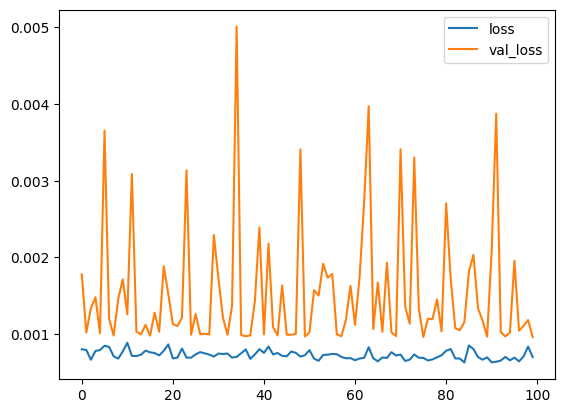

In [44]:
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [45]:
preds = model.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [46]:
y_test

array([0.47103882, 0.4629322 , 0.44876869, 0.4831667 , 0.4578291 ,
       0.46431708, 0.46415587, 0.4759135 , 0.47724086, 0.45282332,
       0.47658581, 0.47449047, 0.48081323, 0.48193654, 0.47727263,
       0.47396997, 0.48244002, 0.48284238, 0.4807026 , 0.49503185,
       0.50659477, 0.51396577, 0.54335393, 0.57419326, 0.56928664,
       0.56262443, 0.57545519, 0.56898625, 0.56977486, 0.53254441,
       0.53557454, 0.5567236 , 0.55867963, 0.54261486, 0.54717142,
       0.53431841, 0.55280064, 0.54761789, 0.56790371, 0.57108817,
       0.57297842, 0.56918531, 0.5585643 , 0.56732953, 0.55128644,
       0.56482948, 0.55286402, 0.54510551, 0.54594969, 0.54753949,
       0.57546591, 0.58707368, 0.55609866, 0.57565075, 0.57539778,
       0.57285059, 0.57217381, 0.61662081, 0.60442377, 0.61158906,
       0.60778373, 0.55617195, 0.55601361, 0.54065505, 0.55116262,
       0.56060251, 0.55454941, 0.532812  , 0.53804374, 0.53873641,
       0.53697755, 0.50705042, 0.51201548, 0.5154146 , 0.51331

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test, preds)

0.9672814520969552

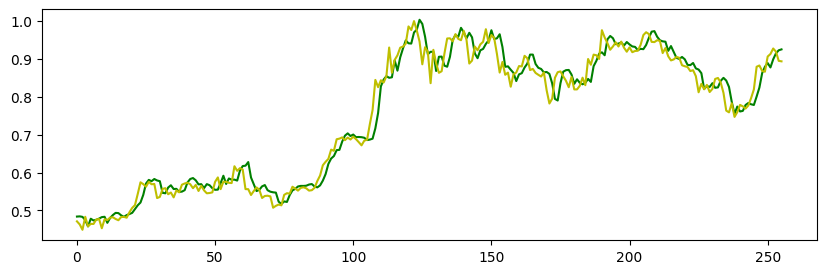

In [58]:
plt.figure(figsize=(10,3))
plt.plot(preds, c='g')
plt.plot(y_test, c='y')

In [ ]:
# LSTM